#**Import Libraries:**


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#**Load Data:**

In [61]:
train_data = pd.read_csv("https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-2/data/train.csv")
display(train_data.head())
test_data = pd.read_csv("https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-2/data/test.csv")
display(test_data.head())


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,621,0,3,male,27.0,1,0,14.4542
1,622,1,1,male,42.0,1,0,52.5542
2,623,1,3,male,20.0,1,1,15.7417
3,624,0,3,male,21.0,0,0,7.8542
4,625,0,3,male,21.0,0,0,16.1000


In [62]:
print("Training Data: Rows - " + str(len(train_data))+ ", Columns - " + str(len(train_data.columns)))
print("Testing data: Rows - " + str(len(test_data))+ ", Columns - "+ str(len(train_data.columns)))

Training Data: Rows - 620, Columns - 8
Testing data: Rows - 271, Columns - 8


#**Data Exploration:**

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  620 non-null    int64  
 1   Survived     620 non-null    int64  
 2   Pclass       620 non-null    int64  
 3   Sex          620 non-null    object 
 4   Age          489 non-null    float64
 5   SibSp        620 non-null    int64  
 6   Parch        620 non-null    int64  
 7   Fare         620 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 38.9+ KB


In [64]:
display(train_data.isnull().head())
display(train_data.isnull().sum())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            131
SibSp            0
Parch            0
Fare             0
dtype: int64

#**Data Preprocessing**
**Missing Data:**

In [65]:
data = [train_data, test_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)
train_data["Age"].isnull().sum()

0

In [66]:
display(data)

[     PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch     Fare
 0              1         0       3    male   22      1      0   7.2500
 1              2         1       1  female   38      1      0  71.2833
 2              3         1       3  female   26      0      0   7.9250
 3              4         1       1  female   35      1      0  53.1000
 4              5         0       3    male   35      0      0   8.0500
 ..           ...       ...     ...     ...  ...    ...    ...      ...
 615          616         1       2  female   24      1      2  65.0000
 616          617         0       3    male   34      1      1  14.4000
 617          618         0       3  female   26      1      0  16.1000
 618          619         1       2  female    4      2      1  39.0000
 619          620         0       2    male   26      0      0  10.5000
 
 [620 rows x 8 columns],
      PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch     Fare
 0            621         0       3  

**Converting Data:**
#####**Sex:**

In [67]:
genders = {"male": 0, "female": 1}
data = [train_data, test_data]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

**PassengerId:**

In [68]:
train_data = train_data.drop(['PassengerId'],axis=1)
test_data = test_data.drop(['PassengerId'],axis=1)

**Age:**

In [69]:
data = [train_data, test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

**Fare:**

In [70]:
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

#**Creating New Features:**
**Age_class, Fare_Per_Person, Family_size**

In [71]:
data = [train_data,test_data]
for df in data:
  df['Age_class'] = df['Age']*df['Pclass']

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['SibSp']+dataset['Parch']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
for dataset in data:
    dataset['Family'] = dataset['SibSp']+dataset['Parch']+1    

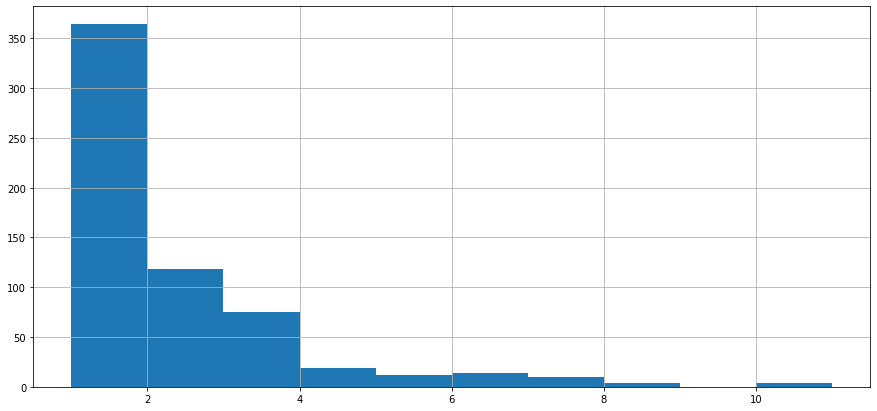

In [72]:
train_data['Family'].hist(figsize=(15,7))

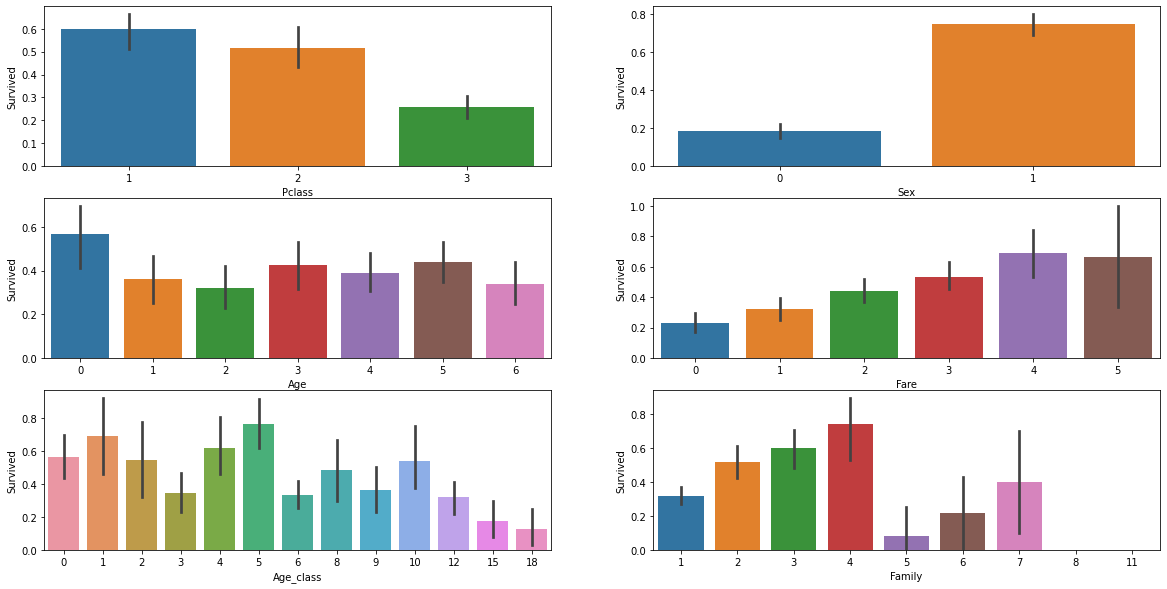

In [73]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sb.barplot(x = 'Pclass', y = 'Survived', data = train_data)
plt.subplot(322)
sb.barplot(x = 'Sex', y = 'Survived', data = train_data)
plt.subplot(323)
sb.barplot(x = 'Age', y = 'Survived', data = train_data)
plt.subplot(324)
sb.barplot(x = 'Fare', y = 'Survived', data = train_data)
plt.subplot(325)
sb.barplot(x = 'Age_class', y = 'Survived', data = train_data)
plt.subplot(326)
sb.barplot(x = 'Family', y = 'Survived', data = train_data)

In [74]:
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_class,Fare_Per_Person,Family
0,0,3,0,2,1,0,0,6,0,2
1,1,1,1,5,1,0,3,5,1,2
2,1,3,1,3,0,0,1,9,1,1
3,1,1,1,5,1,0,3,5,1,2
4,0,3,0,5,0,0,1,15,1,1


**GROUP-BY**

In [75]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
         mean count  sum
Sex                     
0    0.182519   389   71
1    0.748918   231  173

In [76]:
train_data[['Survived']].agg(['mean', 'count', 'sum'])

,Survived
mean,0.393548
count,620.000000
sum,244.000000


##**GINI IMPURITY**
Gini Impurity measures the disorder of a set of elements. It is calculated as the probability of mislabelling an element assuming that the element is randomly labelled according the the distribution of all the classes in the set.

In [77]:
def get_gini_impurity(survived_count, total_count):
    P_survival = survived_count/total_count
    P_not_survival = (1 - P_survival)
    random_observation_survived_prob = P_survival
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survided_prob = P_not_survival * random_observation_survived_prob
    mislabelling_not_survided_prob = P_survival * random_observation_not_survived_prob
    gini_impurity = mislabelling_survided_prob + mislabelling_not_survided_prob
    return gini_impurity

Gini Impurity of the starting node

In [78]:
gini_impurity_starting_node = get_gini_impurity(244, 620)
gini_impurity_starting_node

0.4773361082206035

####*If we split by Sex, we'll have the two following nodes:*

Node with men: 389 observations with only 71 survived

Node with women: 231 observations with 173 survived

In [79]:
gini_impurity_men = get_gini_impurity(71, 389)
gini_impurity_men

0.29841198511772987

In [80]:
gini_impurity_women = get_gini_impurity(173, 231)
gini_impurity_women

0.37607990854744106

In [81]:
men_weight = 389/620
women_weight = 173/620
weighted_gini_impurity_sex_split = (gini_impurity_men * men_weight) + (gini_impurity_women * women_weight)

sex_gini_decrease = weighted_gini_impurity_sex_split - gini_impurity_starting_node
sex_gini_decrease

-0.18516822694720964

####*If we split by Pclass, we'll have the two following nodes:*

Node with 1: 149 observations with only 89 survived

Node with 2: 130 observations with 67 survived

Node with 3: 341 observations with 88 survived

In [83]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).agg(['mean', 'count', 'sum'])

Survived          
            mean count sum
Pclass                    
1       0.597315   149  89
2       0.515385   130  67
3       0.258065   341  88

In [84]:
gini_impurity_Pclass_1 = get_gini_impurity(89, 149)
gini_impurity_Pclass_1

0.48105941173821

In [85]:
gini_impurity_Pclass_2 = get_gini_impurity(67, 130)
gini_impurity_Pclass_2

0.4995266272189349

In [86]:
gini_impurity_Pclass_3 = get_gini_impurity(88, 341)
gini_impurity_Pclass_3

0.3829344432882414

In [87]:
Pclass_1_weights = 149/620
Pclass_2_weights = 130/620
Pclass_3_weights = 341/620
weighted_gini_impurity_Pclass_split = (gini_impurity_Pclass_1 * Pclass_1_weights) + (gini_impurity_Pclass_2 * Pclass_2_weights) + (gini_impurity_Pclass_3 * Pclass_3_weights)

Pclass_gini_decrease = weighted_gini_impurity_Pclass_split - gini_impurity_starting_node
Pclass_gini_decrease

-0.04637327104520811

Here, we can see that Sex feature is better at reducing the gini impurity than Pclass

In [105]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

###Best Tree Depth: Finding with the help of Cross Validation

In [92]:
cv = KFold(n_splits=10)     
accuracies = list()
depth_range = range(1, len(list(test_data))+ 1)

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)    
    for train_fold, valid_fold in cv.split(train_data):
        f_train = train_data.loc[train_fold] 
        f_valid = train_data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"])
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
   
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.791935
         2          0.766129
         3          0.811290
         4          0.820968
         5          0.816129
         6          0.790323
         7          0.782258
         8          0.782258
         9          0.772581
        10          0.767742


##**Decision Tree**

In [98]:
y_train = train_data['Survived']
x_train = train_data.drop(['Survived'], axis=1).values 
x_test = test_data.drop(['Survived'], axis=1).values

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_train)

In [101]:
accuracy = accuracy_score(y_pred,y_train)
print(accuracy)

0.8306451612903226


In [104]:
f1 = f1_score(y_pred,y_train)
print(f1)

0.7597254004576658


In [106]:
log_loss(y_pred,y_train)

5.849409500105124

Test data

In [107]:
y_pred = decision_tree.predict(x_test)

In [108]:
accuracy = accuracy_score(y_pred,test_data['Survived'])
print(accuracy)

0.8154981549815498


In [109]:
f1 = f1_score(y_pred,test_data['Survived'])
print(f1)

0.7058823529411765


In [110]:
log_loss(y_pred,test_data['Survived'])

6.372580090213585